In [1]:
pip install python-constraint


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24085 sha256=fabf07e1c2f69596ac7452f3d3328bc1b23a768a036f98b5bb9fca5e634446ed
  Stored in directory: c:\users\lssnd\appdata\local\pip\cache\wheels\c1\d2\3d\082849b61a9c6de02d4a7c8a402c224640f08d8a971307b92b
Successfully built python-constraint
Note: you may need to restart the kernel to use updated packages.


In [7]:
from constraint import Problem

#Define the Problem
problem = Problem()

#Variables (Positions to Fill)
roles = ["AI Engineer", "Systems Engineer", "Web Designer", "Database Admin"]

#Domains (Candidates for Each Role)
candidates = {
    "AI Engineer": ["Peter", "Juan", "Jim", "Anita", "Maria"],
    "Systems Engineer": ["Juan", "Jim", "Mary", "Bruce"],
    "Web Designer": ["Juan", "Mary", "Anita"],
    "Database Admin": ["Jim", "Jane"]
}

#Add Variables to the Problem with Relevant Domains
problem.addVariable("AI Engineer", candidates["AI Engineer"])
problem.addVariable("Systems Engineer", candidates["Systems Engineer"])
problem.addVariable("Web Designer", candidates["Web Designer"])
problem.addVariable("Database Admin", candidates["Database Admin"])

#Constraint 1: Unique Assignments (No Duplicate Candidates for Roles)
def unique_candidates(*args):
    return len(set(args)) == len(args)  # Ensure all assignments are unique

problem.addConstraint(unique_candidates, roles)

#Constraint 2: Max of Two Roles Per Candidate
def max_roles(*assignments):
    counts = {}
    for candidate in assignments:
        counts[candidate] = counts.get(candidate, 0) + 1
    return all(count <= 2 for count in counts.values())

problem.addConstraint(max_roles, roles)

#Solve the CSP
solutions = problem.getSolutions()

#Display Results
if solutions:
    print("Possible Assignments for Scenario 1:")
    for i, solution in enumerate(solutions, 1):
        print(f"\nSolution {i}:")
        for role, candidate in solution.items():
            print(f" - {role}: {candidate}")
        print("")  #Adds a blank line after each solution
else:
    print("No valid solution found!")


Possible Assignments for Scenario 1:

Solution 1:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Bruce
 - AI Engineer: Maria


Solution 2:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Bruce
 - AI Engineer: Jim


Solution 3:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Bruce
 - AI Engineer: Juan


Solution 4:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Bruce
 - AI Engineer: Peter


Solution 5:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Mary
 - AI Engineer: Maria


Solution 6:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Mary
 - AI Engineer: Jim


Solution 7:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Mary
 - AI Engineer: Juan


Solution 8:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Mary
 - AI Engineer: Peter


Solution 9:
 - Database Admin: Jane
 - Web Designer: Anita
 - Systems Engineer: Jim
 - AI En

## A* Algorithm Solution

In [3]:
import heapq

In [7]:
#Existing Data
positions = ["Database Admin", "Web Designer", "Systems Engineer", "AI Engineer"]
candidates = {
    "Jane": ["Database Admin", "Web Designer"],
    "Anita": ["Web Designer", "AI Engineer"],
    "Bruce": ["Systems Engineer"],
    "Maria": ["AI Engineer"],
    "Jim": ["AI Engineer", "Database Admin"],
    "Mary": ["Systems Engineer", "Web Designer"],
    "Juan": ["AI Engineer", "Web Designer"],
    "Peter": ["AI Engineer", "Systems Engineer"]
}

#Define A* Node
class Node:
    def __init__(self, assignment, cost, remaining_positions):
        self.assignment = assignment
        self.cost = cost
        self.remaining_positions = remaining_positions

    def __lt__(self, other):
        return self.cost < other.cost

#Heuristic Function: Counts unassigned positions (simplified example)
def heuristic(remaining_positions):
    return len(remaining_positions)

#Constraint Check: Valid assignment
def is_valid(assignment, position, candidate):
    #Max 2 roles per person
    if list(assignment.values()).count(candidate) >= 2:
        return False
    #Candidate must be qualified
    return position in candidates[candidate]

#Generate Successors
def successors(node):
    successors_list = []
    for candidate in candidates.keys():
        if node.remaining_positions:
            position = node.remaining_positions[0]
            if is_valid(node.assignment, position, candidate):
                new_assignment = node.assignment.copy()
                new_assignment[position] = candidate
                new_remaining_positions = node.remaining_positions[1:]
                new_cost = len(new_remaining_positions) + heuristic(new_remaining_positions)
                successors_list.append(Node(new_assignment, new_cost, new_remaining_positions))
    return successors_list

#A* Algorithm
def a_star_hiring(positions, candidates):
    initial_node = Node({}, 0, positions)
    frontier = []
    heapq.heappush(frontier, initial_node)
    
    while frontier:
        current_node = heapq.heappop(frontier)
        
        #Goal check
        if not current_node.remaining_positions:
            return current_node.assignment
        
        #Generate successors
        for successor in successors(current_node):
            heapq.heappush(frontier, successor)
    
    return None  #No solution

#Run the A* Algorithm
solution = a_star_hiring(positions, candidates)
print("Ideal Assignment:", solution)


Ideal Assignment: {'Database Admin': 'Jane', 'Web Designer': 'Jane', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Anita'}


## Visualizing Scenario 1

Constraint Visualization:
- Show candidates and their skill sets.
- Illustrate domains for each role (e.g., candidates who qualify for each position).
- Visualize constraints such as "Max Roles per Person" and "One Role per Position."

Solution Visualization:
- Represent the feasible solutions using tables, heatmaps, or bar charts.
- Use a bar chart to show the distribution of roles across candidates.
- Highlight the number of feasible solutions found.

### Candidate Skills Heatmap
A heatmap visually represents which candidates have the required skills for each position.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

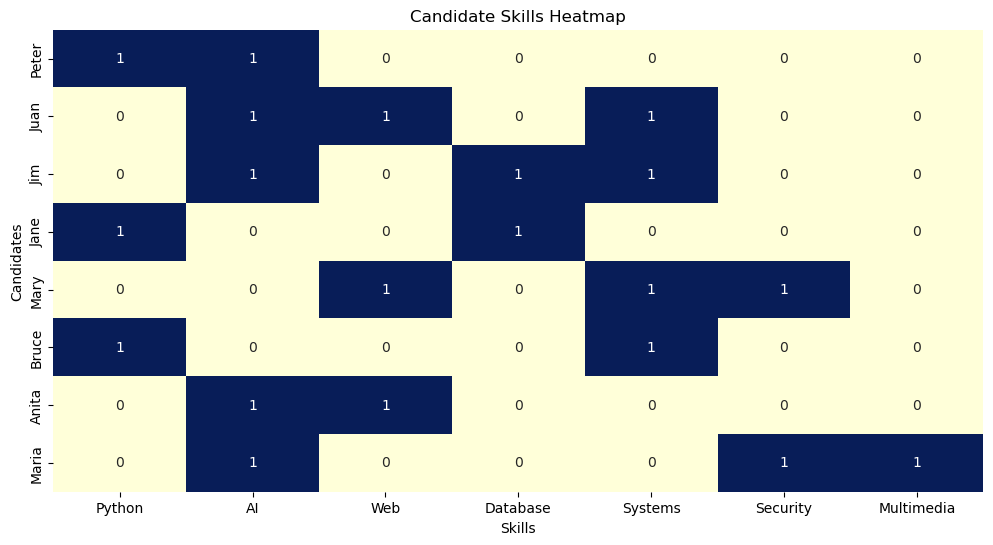

In [20]:
#Data: Candidates and their skills
skills_data = {
    "Candidates": ["Peter", "Juan", "Jim", "Jane", "Mary", "Bruce", "Anita", "Maria"],
    "Python": [1, 0, 0, 1, 0, 1, 0, 0],
    "AI": [1, 1, 1, 0, 0, 0, 1, 1],
    "Web": [0, 1, 0, 0, 1, 0, 1, 0],
    "Database": [0, 0, 1, 1, 0, 0, 0, 0],
    "Systems": [0, 1, 1, 0, 1, 1, 0, 0],
    "Security": [0, 0, 0, 0, 1, 0, 0, 1],
    "Multimedia": [0, 0, 0, 0, 0, 0, 0, 1]
}

df_skills = pd.DataFrame(skills_data)

#Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_skills.set_index("Candidates"), annot=True, cmap="YlGnBu", cbar=False)
plt.title("Candidate Skills Heatmap")
plt.xlabel("Skills")
plt.ylabel("Candidates")
plt.show()